In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
main_dir = "D:\\Competitions\\DataStorm-Final-2021"
data_dir = os.path.join(main_dir,"data\\Data")
logs_dir = os.path.join(main_dir,"logs")
scripts_dir = os.path.join(main_dir,"src\\scripts")
model_dir = os.path.join(main_dir,"src\\models")

In [53]:
filename = "datastorm_policy_data.csv"
dataframe = pd.read_csv(os.path.join(data_dir,filename))
sample = dataframe.sample(n=10)

In [62]:
allColumns = list(dataframe.columns)
allColumns

snapshots = dataframe['policy_snapshot_as_on'].unique()

In [55]:
categorical_columns = []
ordinal_columns = []
continuous_columns = []
remove_columns = ['child1_gender','child2_gender','child3_gender','child4_gender','child5_gender','main_holder_occupation','run_date','product_name']
target_column = 'Survived'

In [56]:
dataframe.shape

(631422, 57)

In [57]:
for each in allColumns:
    print(each,"   ",dataframe[each].unique().size)


main_holder_occupation_cd     319
policy_term     35
policy_payment_mode     5
policy_status     3
commencement_dt     1788
next_due_dt     1438
termination_dt     481
termination_reason     12
main_holder_gender     2
main_holder_dob     634
main_holder_entry_age     50
main_holder_smoker_flag     2
spouse_gender     3
spouse_dob     537
spouse_entry_age     48
spouse_smoker_flag     3
total_sum_assuared     1922
premium_value     6337
rider1_prem     16
rider1_sum_assuared     6
rider2_prem     792
rider2_sum_assuared     708
rider3_prem     250
rider3_sum_assuared     111
rider4_prem     171
rider4_sum_assuared     16
rider5_prem     237
rider5_sum_assuared     61
rider6_prem     231
rider6_sum_assuared     182
rider7_prem     77
rider7_sum_assuared     40
rider8_prem     1747
rider8_sum_assuared     136
rider9_prem     1135
rider9_sum_assuared     14
rider10_prem     625
rider10_sum_assuared     461
child1_dob     283
child1_gender     3
child2_dob     240
child2_gender     3
child

In [58]:
dataframe.groupby(by = ['policy_code','client_code']).count()

,,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,...,child4_gender,child5_dob,child5_gender,payment_method,main_holder_occupation,policy_snapshot_as_on,run_date,agent_code,product_code,product_name
policy_code,client_code,,,,,,,,,,,,,,,,,,,,,
POL0001,C105157,20,20,20,20,20,20,0,0,20,20,...,0,0,0,20,20,20,20,20,20,20
POL0002,C109481,20,20,20,20,20,20,0,0,20,20,...,0,0,0,20,20,20,20,20,20,20
POL0003,C101338,20,20,20,20,20,20,0,0,20,20,...,0,0,0,20,20,20,20,20,20,20
POL0004,C111935,20,20,20,20,20,20,0,0,20,20,...,0,0,0,20,0,20,20,20,20,20
POL0005,C120566,20,20,20,20,20,20,0,0,20,20,...,0,0,0,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POL9995,C100099,20,20,20,20,20,20,0,0,20,20,...,0,0,0,20,20,20,20,20,20,20
POL9996,C118651,20,20,20,20,20,20,0,0,20,20,...,0,0,0,20,20,20,20,20,20,20
POL9997,C104744,20,20,20,20,20,20,0,0,20,20,...,0,0,0,20,0,20,20,20,20,20


In [59]:
dataframe.loc[(dataframe['policy_code'] == "POL0001")&(dataframe['client_code'] == "C105157")].sort_values(by=["policy_snapshot_as_on"],ascending=True)["policy_snapshot_as_on"]

407160    20181231
441966    20190131
441253    20190228
591608    20190331
361258    20190430
617651    20190531
310302    20190630
389657    20190731
512630    20190831
459308    20190901
480718    20191001
285789    20191101
137709    20191201
29354     20200101
464432    20200201
611563    20200301
354513    20200401
387678    20200501
380645    20200601
599447    20200701
Name: policy_snapshot_as_on, dtype: int64

In [77]:
def add_index(df):
    df['policy_snapshot'] = pd.to_datetime(df['policy_snapshot_as_on'],format='%Y%m%d')
    df['unique'] = df['policy_snapshot_as_on'].apply(str)+" "+df['client_code']
    df.sort_values(by=["unique"],ascending=True,inplace=True)
    return df


def count_riders(df):
    rider_df = df[['rider1_prem','rider1_sum_assuared','rider2_prem','rider2_sum_assuared','rider3_prem','rider3_sum_assuared','rider4_prem','rider4_sum_assuared','rider5_prem','rider5_sum_assuared','rider6_prem','rider6_sum_assuared','rider7_prem','rider7_sum_assuared','rider8_prem','rider8_sum_assuared','rider9_prem','rider9_sum_assuared','rider10_prem','rider10_sum_assuared']]

    return rider_df

count_riders(sample)





,rider1_prem,rider1_sum_assuared,rider2_prem,rider2_sum_assuared,rider3_prem,rider3_sum_assuared,rider4_prem,rider4_sum_assuared,rider5_prem,rider5_sum_assuared,rider6_prem,rider6_sum_assuared,rider7_prem,rider7_sum_assuared,rider8_prem,rider8_sum_assuared,rider9_prem,rider9_sum_assuared,rider10_prem,rider10_sum_assuared
468065,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0
78212,0,0,2580.0,982000,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0
394838,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,420.0,100000,0,0,0,0
607526,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0
218918,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0
82558,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0
142329,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0
376962,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0
48812,0,0,444.0,250000,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0
106512,0,0,1400.0,400000,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0


In [ ]:
#add_index(sample)[['unique',"policy_snapshot_as_on"]]

In [76]:
#add_index(dataframe)
#dataframe.to_csv(os.path.join(data_dir,"indexed.csv"))

In [ ]:
dataframe.isnull().sum()

KeyError: 'Survived'

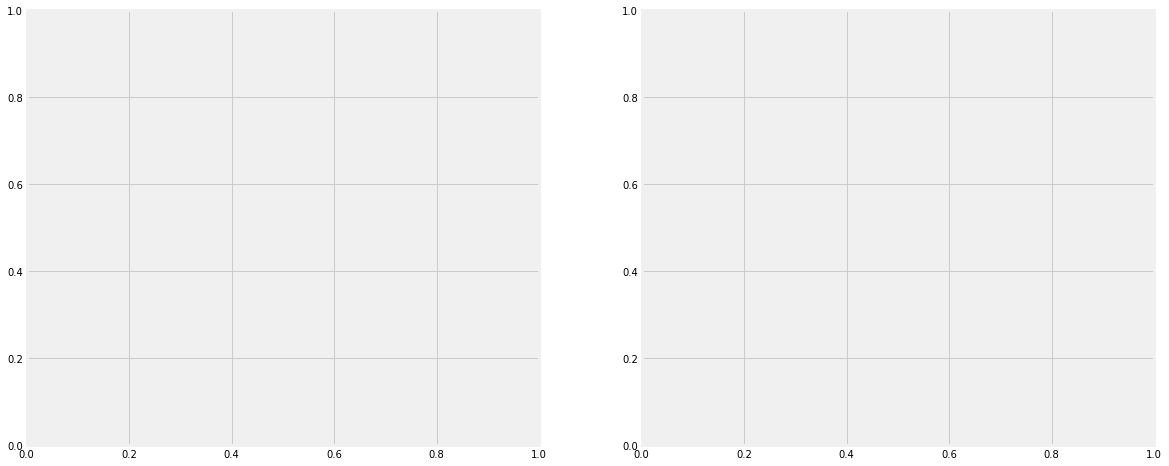

In [50]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataframe[target_column].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(target_column)
ax[0].set_ylabel(target_column)
sns.countplot(target_column,data=dataframe,ax=ax[1])
ax[1].set_title(target_column)
plt.show()

In [ ]:
def categorical_bar(column):
    f,ax=plt.subplots(1,2,figsize=(18,8))
    dataframe[[column,target_column]].groupby([column]).mean().plot.bar(ax=ax[0])
    ax[0].set_title(f'{target_column} vs {column}')
    sns.countplot(column,hue=target_column,data=dataframe,ax=ax[1])
    ax[1].set_title(f'{column}:{target_column} vs other')
    plt.show()

In [ ]:
categorical_bar('Sex')

In [ ]:
categorical_bar('Pclass')